In [1]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

from scipy.stats import zscore

In [2]:
# 2. Load Dataset
df = pd.read_csv("adult 3.csv")  # Replace with your file
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (48842, 15)


,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [3]:
# 3. EDA
print(df.info())
print("\nMissing Values:\n", df.isnull().sum())
print("\nIncome Distribution:\n", df['income'].value_counts())

# Replace '?' with NaN and drop missing
df.replace('?', np.nan, inplace=True)
df.dropna(inplace=True)
print("\nAfter Dropping Nulls:", df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None

Missing Values:
 age                0
workclass          0
fnlwgt     

In [4]:
# 4. Data Preprocessing
categorical_cols = df.select_dtypes(include='object').columns
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
print(df.head())

   age  workclass  fnlwgt  education  educational-num  marital-status  \
0   25          2  226802          1                7               4   
1   38          2   89814         11                9               2   
2   28          1  336951          7               12               2   
3   44          2  160323         15               10               2   
5   34          2  198693          0                6               4   

   occupation  relationship  race  gender  capital-gain  capital-loss  \
0           6             3     2       1             0             0   
1           4             0     4       1             0             0   
2          10             0     4       1             0             0   
3           6             0     2       1          7688             0   
5           7             1     4       1             0             0   

   hours-per-week  native-country  income  
0              40              38       0  
1              50              38 

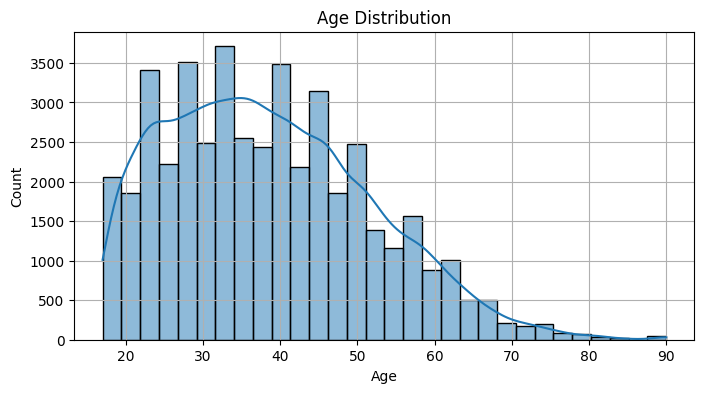

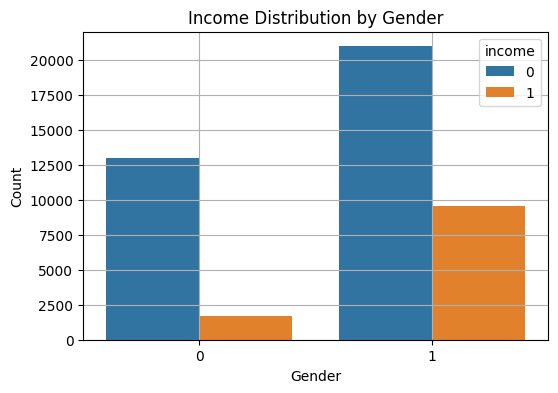

In [5]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 4))
sns.countplot(x='gender', hue='income', data=df)
plt.title("Income Distribution by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.grid(True)
plt.show()

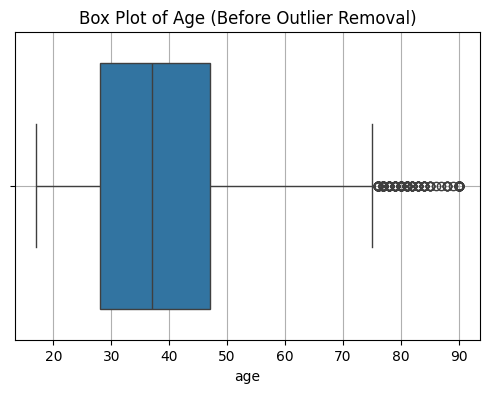

In [6]:
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title("Box Plot of Age (Before Outlier Removal)")
plt.grid(True)
plt.show()

In [7]:
# Remove outliers from 'age' using IQR method
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame to remove outliers
df = df[(df['age'] >= lower_bound) & (df['age'] <= upper_bound)]

print("After removing outliers from 'age':", df.shape)

After removing outliers from 'age': (44953, 15)


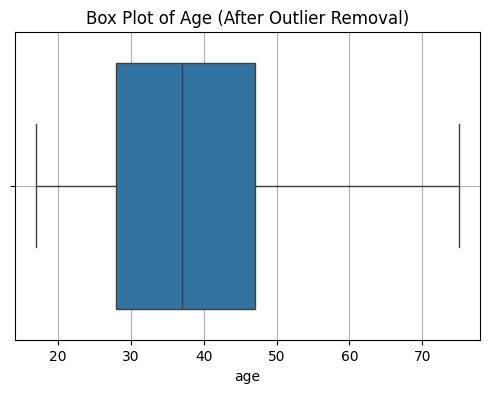

In [8]:
# Box plot for 'age' after outlier removal
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['age'])
plt.title("Box Plot of Age (After Outlier Removal)")
plt.grid(True)
plt.show()

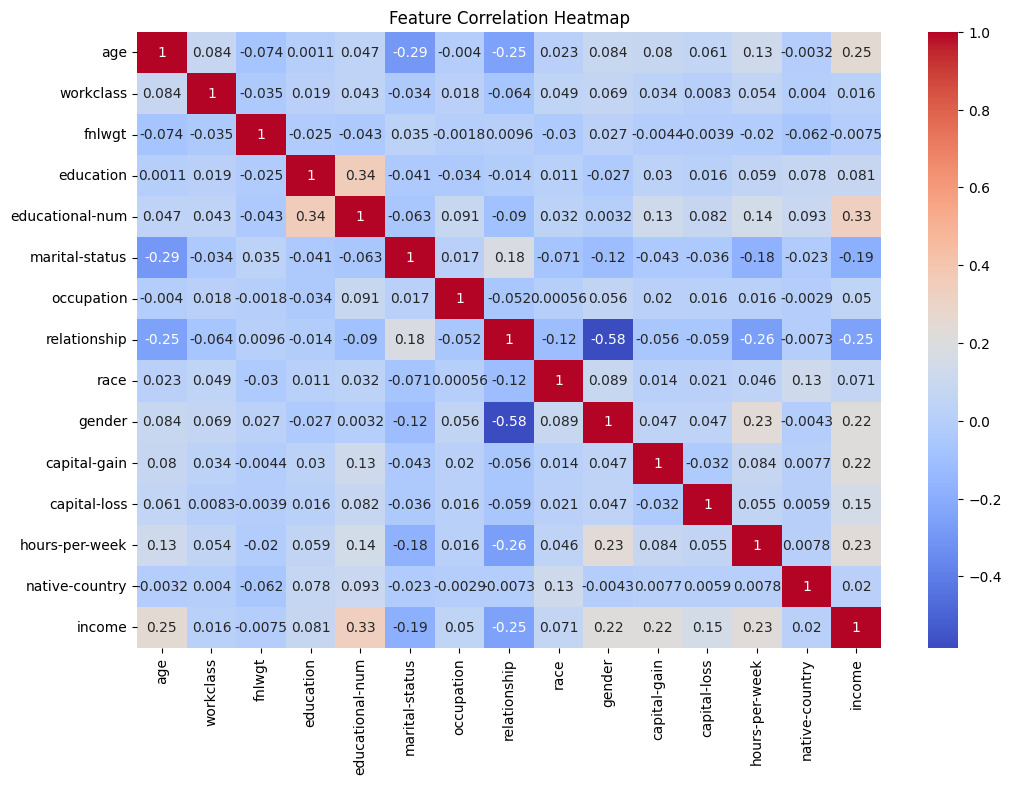

In [9]:
# 8. Correlation Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

In [10]:
# 9. Feature-Target Split
X = df.drop('income', axis=1)
y = df['income']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Create encoders
education_encoder = LabelEncoder()
occupation_encoder = LabelEncoder()
workclass_encoder = LabelEncoder()
marital_encoder = LabelEncoder()
relationship_encoder = LabelEncoder()
race_encoder = LabelEncoder()
gender_encoder = LabelEncoder()
country_encoder = LabelEncoder()

# Encode each column if it exists
if 'education' in df.columns:
    df['education'] = education_encoder.fit_transform(df['education'].astype(str))
    joblib.dump(education_encoder, "education_encoder.pkl")
else:
    print("❌ 'education' column not found in df")

if 'occupation' in df.columns:
    df['occupation'] = occupation_encoder.fit_transform(df['occupation'].astype(str))
    joblib.dump(occupation_encoder, "occupation_encoder.pkl")
else:
    print("❌ 'occupation' column not found in df")

if 'workclass' in df.columns:
    df['workclass'] = workclass_encoder.fit_transform(df['workclass'].astype(str))
    joblib.dump(workclass_encoder, "workclass_encoder.pkl")
else:
    print("❌ 'workclass' column not found in df")

if 'marital-status' in df.columns:
    df['marital-status'] = marital_encoder.fit_transform(df['marital-status'].astype(str))
    joblib.dump(marital_encoder, "marital_encoder.pkl")
else:
    print("❌ 'marital-status' column not found in df")

if 'relationship' in df.columns:
    df['relationship'] = relationship_encoder.fit_transform(df['relationship'].astype(str))
    joblib.dump(relationship_encoder, "relationship_encoder.pkl")
else:
    print("❌ 'relationship' column not found in df")

if 'race' in df.columns:
    df['race'] = race_encoder.fit_transform(df['race'].astype(str))
    joblib.dump(race_encoder, "race_encoder.pkl")
else:
    print("❌ 'race' column not found in df")

if 'gender' in df.columns:
    df['gender'] = gender_encoder.fit_transform(df['gender'].astype(str))
    joblib.dump(gender_encoder, "gender_encoder.pkl")
else:
    print("❌ 'gender' column not found in df")

if 'native-country' in df.columns:
    df['native-country'] = country_encoder.fit_transform(df['native-country'].astype(str))
    joblib.dump(country_encoder, "country_encoder.pkl")
else:
    print("❌ 'native-country' column not found in df")


In [12]:
# 10. Model Training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

Accuracy: 0.8498498498498499

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.90      6718
           1       0.75      0.61      0.67      2273

    accuracy                           0.85      8991
   macro avg       0.81      0.77      0.79      8991
weighted avg       0.84      0.85      0.84      8991


Confusion Matrix:
 [[6253  465]
 [ 885 1388]]


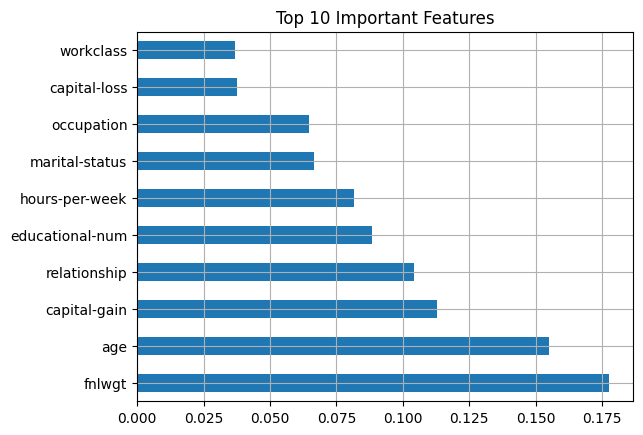

In [13]:
# 11. Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
feature_importances.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features")
plt.grid(True)
plt.show()

In [14]:
# 12.Save the modal
import joblib

# Save the trained model to a file
joblib.dump(model, 'salary_model.pkl')
print("Model saved as 'salary_model.pkl'")

Model saved as 'salary_model.pkl'


In [15]:
%%writefile app.py
import streamlit as st
import pandas as pd
import joblib

# Load the trained model
model = joblib.load("salary_model.pkl")

# Load label encoders for categorical columns
education_encoder = joblib.load("education_encoder.pkl")
workclass_encoder = joblib.load("workclass_encoder.pkl")
marital_encoder = joblib.load("marital_encoder.pkl")
occupation_encoder = joblib.load("occupation_encoder.pkl")
relationship_encoder = joblib.load("relationship_encoder.pkl")
race_encoder = joblib.load("race_encoder.pkl")
gender_encoder = joblib.load("gender_encoder.pkl")
country_encoder = joblib.load("country_encoder.pkl")

st.set_page_config(page_title="Employee Salary Classification", page_icon="💼", layout="wide")
st.title("💼 Employee Salary Classification App")
st.markdown("Predict whether an employee earns >50K or ≤50K based on full profile features.")

# Sidebar inputs
st.sidebar.header("🧾 Input Employee Details")

age = st.sidebar.slider("Age", 18, 90, 30)
workclass = st.sidebar.selectbox("Workclass", workclass_encoder.classes_)
fnlwgt = st.sidebar.number_input("FNLWGT", value=100000)
education = st.sidebar.selectbox("Education Level", education_encoder.classes_)
educational_num = st.sidebar.slider("Educational Num", 1, 16, 10)
marital_status = st.sidebar.selectbox("Marital Status", marital_encoder.classes_)
occupation = st.sidebar.selectbox("Occupation", occupation_encoder.classes_)
relationship = st.sidebar.selectbox("Relationship", relationship_encoder.classes_)
race = st.sidebar.selectbox("Race", race_encoder.classes_)
gender = st.sidebar.selectbox("Gender", gender_encoder.classes_)
capital_gain = st.sidebar.number_input("Capital Gain", value=0)
capital_loss = st.sidebar.number_input("Capital Loss", value=0)
hours_per_week = st.sidebar.slider("Hours per Week", 1, 99, 40)
native_country = st.sidebar.selectbox("Native Country", country_encoder.classes_)

# Encode categorical fields
encoded_input = {
    'age': age,
    'workclass': workclass_encoder.transform([workclass])[0],
    'fnlwgt': fnlwgt,
    'education': education_encoder.transform([education])[0],
    'educational-num': educational_num,
    'marital-status': marital_encoder.transform([marital_status])[0],
    'occupation': occupation_encoder.transform([occupation])[0],
    'relationship': relationship_encoder.transform([relationship])[0],
    'race': race_encoder.transform([race])[0],
    'gender': gender_encoder.transform([gender])[0],
    'capital-gain': capital_gain,
    'capital-loss': capital_loss,
    'hours-per-week': hours_per_week,
    'native-country': country_encoder.transform([native_country])[0],
}

# Convert to dataframe
input_df = pd.DataFrame([encoded_input])

st.write("### 🔍 Input Data")
st.write(input_df)

if st.button("Predict Salary Class"):
    prediction = model.predict(input_df)
    label = ">50K" if prediction[0] == 1 else "≤50K"
    st.success(f"✅ Prediction: {label}")

# --- Batch Prediction Section ---
st.markdown("---")
st.markdown("#### 📂 Batch Prediction from CSV")
uploaded_file = st.file_uploader("Upload CSV file with 14 features", type="csv")

if uploaded_file is not None:
    batch_data = pd.read_csv(uploaded_file)
    st.write("Preview of Uploaded Data:")
    st.write(batch_data.head())

    # Encode categorical columns
    batch_data['workclass'] = workclass_encoder.transform(batch_data['workclass'])
    batch_data['education'] = education_encoder.transform(batch_data['education'])
    batch_data['marital-status'] = marital_encoder.transform(batch_data['marital-status'])
    batch_data['occupation'] = occupation_encoder.transform(batch_data['occupation'])
    batch_data['relationship'] = relationship_encoder.transform(batch_data['relationship'])
    batch_data['race'] = race_encoder.transform(batch_data['race'])
    batch_data['gender'] = gender_encoder.transform(batch_data['gender'])
    batch_data['native-country'] = country_encoder.transform(batch_data['native-country'])

    batch_preds = model.predict(batch_data)
    batch_data['PredictedClass'] = ['>50K' if pred == 1 else '≤50K' for pred in batch_preds]

    st.write("✅ Batch Predictions:")
    st.write(batch_data.head())

    # Downloadable output
    csv_output = batch_data.to_csv(index=False).encode('utf-8')
    st.download_button("Download Results CSV", csv_output, file_name='salary_predictions.csv', mime='text/csv')


Overwriting app.py


In [ ]:
!streamlit run app.py